# Project :Trivago Data Set Analysis 

### Organization of Analysis

## 0. Data Exploration & Pre-Feature Correction 

## Initializing Packages 

In [99]:
import pandas as pd          
import numpy as np  # For mathematical calculations 
import matplotlib.pyplot as plt  # For plotting graphs 

import seaborn as sns
from sklearn.model_selection import train_test_split
from datetime import datetime    # To access datetime 
from pandas import Series        # To work on series 
%matplotlib inline 
import warnings                   # To ignore the warnings warnings.filterwarnings("ignore")

from sklearn.metrics import mean_squared_error
from math import sqrt

# Loading Data

In [100]:
# Assign spreadsheet filename to `file`
file = 'click_pred_data.xlsx'

# Load spreadsheet
xl = pd.ExcelFile(file)

# Print the sheet names
print(xl.sheet_names)

# Load a sheet into a DataFrame by name: DataSet
DataSet = xl.parse('Sheet1')

print(DataSet.shape)

['Sheet1']
(800268, 29)


### Given data set is called data

In [101]:
data = DataSet
data.head()

,Id,trivago_id,hotel_impr,avg_cpc,clicks,booking_value_index,stars,rating,weekday,log_date,...,profit,revenue,total_night,total_rooms,bolge,holiday_diff,days_of_holiday,Status,kur,opp_cpc
0,1,3503572,113,0.06,0,1,0,84.90,Thursday,2018-10-11 00:00:00.000,...,-1.11,0.000000e+00,0.0,0.0,ic_anadolu,18,3,Gök Gürültülü Sağnak Yağmur,6.9211,0.08
1,2,921561,437,0.06,1,1,3,83.53,Thursday,2018-10-11 00:00:00.000,...,0.00,0.000000e+00,0.0,0.0,marmara,18,3,Yağmurlu,6.9211,0.17
2,3,4928304,613,0.16,23,4,0,78.87,Thursday,2018-10-11 00:00:00.000,...,1981-11-01 00:00:00,3.750000e+09,1.0,1.0,marmara,18,3,Yağmurlu,6.9211,0.23
3,4,112719,4473,0.08,80,1,4,77.85,Sunday,2018-05-20 00:00:00.000,...,58.59,5.920500e+09,2.0,2.0,ege,25,4,Güneşli,5.4015,0.08
4,5,1625365,520,0.11,6,1,0,74.97,Sunday,2018-06-03 00:00:00.000,...,20.67,3.425850e+09,1.0,1.0,ic_anadolu,11,4,ParçalıBulutlu,5.4238,0.16


In [102]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800268 entries, 0 to 800267
Data columns (total 29 columns):
Id                     800268 non-null int64
trivago_id             800268 non-null int64
hotel_impr             800268 non-null int64
avg_cpc                791218 non-null float64
clicks                 800268 non-null int64
booking_value_index    800268 non-null int64
stars                  800268 non-null int64
rating                 800268 non-null float64
weekday                800268 non-null object
log_date               800268 non-null object
hotel_types            800268 non-null object
my_min_position        701182 non-null float64
my_price               701182 non-null float64
top4_min_price         799746 non-null float64
total_min_price        800268 non-null int64
rival1_price           550570 non-null float64
rival1_min_position    550570 non-null float64
rival2_price           458184 non-null float64
rival2_min_position    458184 non-null float64
profit       

In [103]:
data.describe()

,Id,trivago_id,hotel_impr,avg_cpc,clicks,booking_value_index,stars,rating,my_min_position,my_price,...,rival1_min_position,rival2_price,rival2_min_position,revenue,total_night,total_rooms,holiday_diff,days_of_holiday,kur,opp_cpc
count,800268.000000,8.002680e+05,800268.000000,791218.000000,800268.000000,800268.000000,800268.000000,800268.000000,701182.000000,701182.000000,...,550570.000000,458184.000000,458184.000000,7.715070e+05,771507.000000,771507.000000,800268.000000,800268.000000,663298.000000,787785.000000
mean,400462.518605,3.931219e+06,718.808298,0.057824,11.673548,2.317096,1.801150,61.062208,2.396314,287.246539,...,2.734415,307.276402,3.352891,1.027061e+09,0.247643,0.173818,31.824785,4.108281,6.148209,0.089909
std,231510.453857,2.963412e+06,1350.319142,0.042225,29.965377,1.578553,1.927448,33.913312,4.105354,358.376705,...,4.615098,350.340321,5.691424,5.978201e+09,1.242149,0.862981,28.983523,2.053155,0.750083,0.049472
min,1.000000,9.125000e+03,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,1.000000,0.000000e+00,0.000000,0.000000,1.000000,2.000000,4.992000,0.000000
25%,200067.750000,1.672771e+06,97.000000,0.030000,0.000000,1.000000,0.000000,66.720000,1.000000,165.000000,...,1.000000,179.000000,1.000000,0.000000e+00,0.000000,0.000000,10.000000,3.000000,5.478300,0.060000
50%,400134.500000,3.160466e+06,272.000000,0.050000,2.000000,2.000000,0.000000,78.320000,2.000000,223.000000,...,2.000000,242.000000,2.000000,0.000000e+00,0.000000,0.000000,23.000000,4.000000,6.066600,0.080000
75%,600201.250000,5.822542e+06,723.000000,0.070000,11.000000,4.000000,4.000000,82.090000,2.000000,321.000000,...,3.000000,345.000000,3.000000,0.000000e+00,0.000000,0.000000,44.000000,4.000000,6.799000,0.100000
max,802711.000000,1.228660e+07,26645.000000,2.000000,1252.000000,5.000000,5.000000,96.170000,179.000000,54252.000000,...,184.000000,36880.000000,164.000000,3.595593e+11,64.000000,42.000000,112.000000,9.000000,7.860400,0.920000


### Number of unique values in each column

In [104]:
data.apply(lambda x: len(x.unique()))

Id                     800268
trivago_id               6165
hotel_impr              11551
avg_cpc                   110
clicks                    665
booking_value_index         5
stars                       6
rating                   4418
weekday                     7
log_date                  268
hotel_types                 3
my_min_position           135
my_price                 3334
top4_min_price           4586
total_min_price          4438
rival1_price             4849
rival1_min_position       131
rival2_price             3081
rival2_min_position       126
profit                  28154
revenue                 33076
total_night                57
total_rooms                44
bolge                       8
holiday_diff               95
days_of_holiday             4
Status                     30
kur                       187
opp_cpc                   136
dtype: int64

In [105]:
# Check for duplicates in trivago_id feature
idsUnique = len(set(data.trivago_id))
idsTotal = data.shape[0]
idsDupli = idsTotal - idsUnique
print("There are " + str(idsDupli) + " duplicate IDs for " + str(idsTotal) + " total entries")

There are 794103 duplicate IDs for 800268 total entries


### Feature types

In [106]:
numeric_features=data.select_dtypes(include=[np.number])
print(numeric_features.dtypes)

categorical_features=data.select_dtypes(include=[np.object])
print(categorical_features.dtypes)

Id                       int64
trivago_id               int64
hotel_impr               int64
avg_cpc                float64
clicks                   int64
booking_value_index      int64
stars                    int64
rating                 float64
my_min_position        float64
my_price               float64
top4_min_price         float64
total_min_price          int64
rival1_price           float64
rival1_min_position    float64
rival2_price           float64
rival2_min_position    float64
revenue                float64
total_night            float64
total_rooms            float64
holiday_diff             int64
days_of_holiday          int64
kur                    float64
opp_cpc                float64
dtype: object
weekday        object
log_date       object
hotel_types    object
profit         object
bolge          object
Status         object
dtype: object


#### Some variables are given as numeric variables, but they should be treated as categorical

In [107]:
data.booking_value_index = data.booking_value_index.astype(str)
data.stars = data.stars.astype(str)

#### Some variables are given as categorical, but they should be treated as numerical

In [108]:
# profit is given as categorical, but converted to numerical
data['profit'] = pd.to_numeric(data['profit'],errors='coerce')

##### Need to change log_date variable to decrease number of categories of log_date, so create 2 new simpler features from log date : log_date_month variable shows month information and modified log_date shows month-year information. They have small number of categories.

In [109]:
# month feature from log date
data["log_date_month"] = pd.DataFrame(data["log_date"]).applymap(lambda x:x[5:7])

#month-year  feature from log date
data["log_date"] = pd.DataFrame(data["log_date"]).applymap(lambda x:x[0:7])

#print(data.log_date_month.head())
print(data.log_date.head())
print(data.log_date_month.head())

#data.log_date_month = data.log_date_month.astype(str)
#data.log_date = data.log_date_year_month.astype(str)


0    2018-10
1    2018-10
2    2018-10
3    2018-05
4    2018-06
Name: log_date, dtype: object
0    10
1    10
2    10
3    05
4    06
Name: log_date_month, dtype: object


## 1. Explarotory Data Analysis (EDA) (to see the distribution of features )

### 1.1 Univariate Distribution of features

### 1.1.1 Distribution of the target variable : clicks

C:\Users\ASUS\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5, 1.0, 'clicks Distribution')

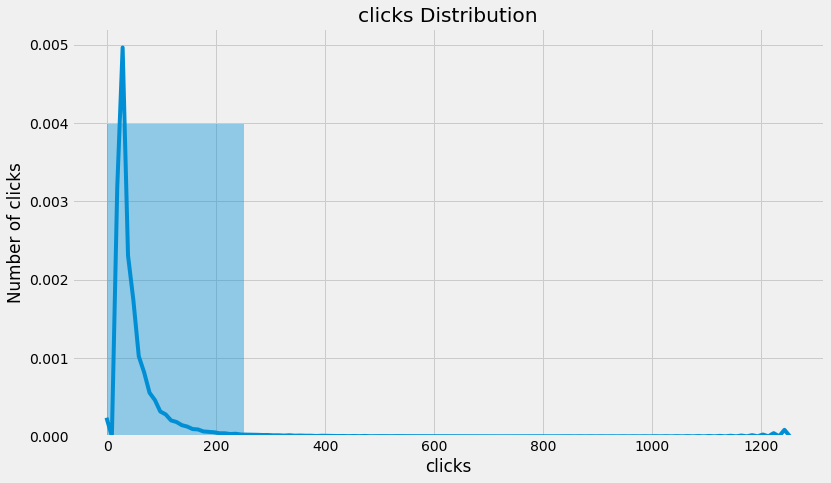

In [110]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(12,7))
sns.distplot(data.clicks, bins = 5)
plt.ticklabel_format(style='plain', axis='x', scilimits=(0,1))
plt.xlabel("clicks")
plt.ylabel("Number of clicks")
plt.title("clicks Distribution")

In [111]:
print ("Skew is:", data.clicks.skew())
print("Kurtosis: %f" % data.clicks.kurt())

Skew is: 8.561946255991549
Kurtosis: 134.433457


### 1.1.2 Numerical Variables of the data

In [112]:
numeric_features = data.select_dtypes(include=[np.number])
numeric_features.dtypes

Id                       int64
trivago_id               int64
hotel_impr               int64
avg_cpc                float64
clicks                   int64
rating                 float64
my_min_position        float64
my_price               float64
top4_min_price         float64
total_min_price          int64
rival1_price           float64
rival1_min_position    float64
rival2_price           float64
rival2_min_position    float64
profit                 float64
revenue                float64
total_night            float64
total_rooms            float64
holiday_diff             int64
days_of_holiday          int64
kur                    float64
opp_cpc                float64
dtype: object

#### Correlation 

In [113]:
numeric_features.corr()

,Id,trivago_id,hotel_impr,avg_cpc,clicks,rating,my_min_position,my_price,top4_min_price,total_min_price,...,rival2_price,rival2_min_position,profit,revenue,total_night,total_rooms,holiday_diff,days_of_holiday,kur,opp_cpc
Id,1.000000,0.068637,-0.160271,0.068114,-0.078796,-0.098580,0.025357,-0.038490,-0.011865,-0.015362,...,-0.058395,0.009923,0.001039,-0.007208,-0.001957,0.003991,0.520498,0.001864,0.236071,0.062284
trivago_id,0.068637,1.000000,-0.199074,-0.006414,-0.068853,-0.577224,-0.109667,-0.050280,-0.053157,-0.052626,...,-0.042142,-0.089295,-0.027720,-0.042748,-0.038394,-0.033563,0.047460,0.013931,0.027003,-0.047034
hotel_impr,-0.160271,-0.199074,1.000000,0.042797,0.402426,0.187897,0.066304,0.078607,0.090755,0.093749,...,0.098497,0.031404,0.092682,0.183958,0.162471,0.146512,-0.122210,0.119426,-0.107266,0.073509
avg_cpc,0.068114,-0.006414,0.042797,1.000000,0.219671,0.079236,-0.092653,-0.017457,-0.026420,-0.027725,...,-0.021322,0.122373,0.112883,0.255253,0.284336,0.320377,0.028149,-0.075229,-0.144885,0.779849
clicks,-0.078796,-0.068853,0.402426,0.219671,1.000000,0.073471,-0.081971,-0.028306,-0.012924,-0.012163,...,-0.007566,0.032832,0.180703,0.408935,0.443829,0.440861,-0.059404,0.067858,-0.062748,0.132404
rating,-0.098580,-0.577224,0.187897,0.079236,0.073471,1.000000,0.108689,0.062292,0.050330,0.050010,...,0.057373,0.096868,0.036597,0.061837,0.064537,0.069762,-0.081147,-0.061304,-0.083487,0.122634
my_min_position,0.025357,-0.109667,0.066304,-0.092653,-0.081971,0.108689,1.000000,0.117616,0.085391,0.079060,...,0.107740,0.143661,-0.010588,-0.028867,-0.040979,-0.043242,0.042487,-0.000094,0.114133,-0.001669
my_price,-0.038490,-0.050280,0.078607,-0.017457,-0.028306,0.062292,0.117616,1.000000,0.615524,0.628447,...,0.658421,0.090647,0.012299,0.002515,-0.026796,-0.031021,-0.027712,0.046309,0.062235,0.031276
top4_min_price,-0.011865,-0.053157,0.090755,-0.026420,-0.012924,0.050330,0.085391,0.615524,1.000000,0.961300,...,0.806784,0.070549,0.008395,0.002222,-0.019701,-0.023858,-0.009683,0.030851,0.044073,0.008198
total_min_price,-0.015362,-0.052626,0.093749,-0.027725,-0.012163,0.050010,0.079060,0.628447,0.961300,1.000000,...,0.885616,0.066417,0.008446,0.002309,-0.019932,-0.024248,-0.011244,0.031940,0.035579,0.007783


In [114]:
corr = numeric_features.corr()
print (corr['clicks'].sort_values(ascending=False))

clicks                 1.000000
total_night            0.443829
total_rooms            0.440861
revenue                0.408935
hotel_impr             0.402426
avg_cpc                0.219671
profit                 0.180703
opp_cpc                0.132404
rival1_min_position    0.079645
rating                 0.073471
days_of_holiday        0.067858
rival2_min_position    0.032832
rival1_price           0.004317
rival2_price          -0.007566
total_min_price       -0.012163
top4_min_price        -0.012924
my_price              -0.028306
holiday_diff          -0.059404
kur                   -0.062748
trivago_id            -0.068853
Id                    -0.078796
my_min_position       -0.081971
Name: clicks, dtype: float64


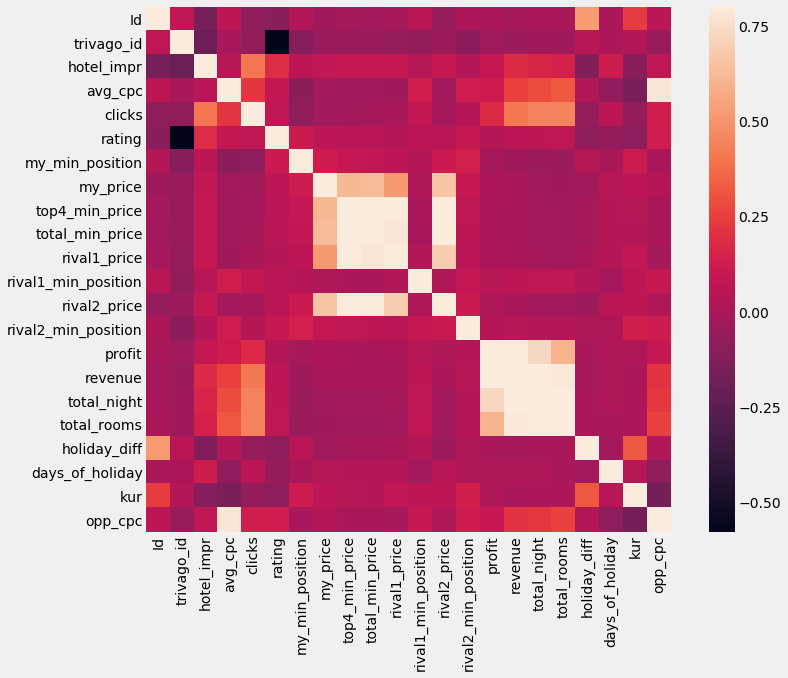

In [115]:
#correlation matrix
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corr, vmax=.8, square=True);

## 1.1.3 Categorical Variables

In [116]:
categorical_features=data.select_dtypes(include=[np.object])
categorical_features.dtypes

booking_value_index    object
stars                  object
weekday                object
log_date               object
hotel_types            object
bolge                  object
Status                 object
log_date_month         object
dtype: object

### Pre-Feature Category Correction is required : Need to modify categories of some variables before plotting to see correct distributions of categories

In [117]:
#Change categories of hotel_types:
print ('Original Categories:')
print (data['hotel_types'].value_counts())

print ('\nModified Categories:')
data['hotel_types'] = data['hotel_types'].replace({'Summer':'summer','Summer ':'summer'})
print (data['hotel_types'].value_counts())

Original Categories:
City       541296
Summer     234007
Summer      24965
Name: hotel_types, dtype: int64

Modified Categories:
City      541296
summer    258972
Name: hotel_types, dtype: int64


In [118]:
#Change categories of bolge:
print ('Original Categories:')
print (data['bolge'].value_counts())

print ('\nModified Categories:')
data['bolge'] = data['bolge'].replace({'Marmara':'marmara'})
print (data['bolge'].value_counts())

Original Categories:
marmara              264243
ege                  161768
akdeniz              117941
ic_anadolu            96619
karadeniz             73834
Marmara               50079
guneydogu_anadolu     19759
dogu_anadolu          16025
Name: bolge, dtype: int64

Modified Categories:
marmara              314322
ege                  161768
akdeniz              117941
ic_anadolu            96619
karadeniz             73834
guneydogu_anadolu     19759
dogu_anadolu          16025
Name: bolge, dtype: int64


In [119]:
#Change categories of Status:
print ('Original Categories:')
print (data['Status'].value_counts())

print ('\nModified Categories:')
data['Status'] = data['Status'].replace({'Az Bulutlu':'AzBulutlu ','Sağanak Yağış':'SağanakYağış','Çoğunlukla Bulutlu':'ÇoğunluklaBulutlu',
                                         'Parçalı Bulutlu':'ParçalıBulutlu','Gök Gürültülü Sağnak Yağmur':'GökGürültülüSağnakYağmur',
                                         'Parçalı Güneşli Sağanak Yağış':'ParçalıGüneşliSağanakYağış',
                                         'Çoğunlukla Bulutlu Sağanak Yağışlı':'Çoğunlukla Bulutlu Sağanak Yağışlı',
                                         'Yoğun Bulutlu':'YoğunBulutlu','AzBulutlu ':'AzBulutlu',
                                         'Çoğunlukla Bulutlu Sağanak Yağışlı':'ÇoğunluklaBulutluSağanakYağışlı'})
print (data['Status'].value_counts())

Original Categories:
Parçalı Bulutlu                       101090
Güneşli                                89800
Az Bulutlu                             75981
Sağanak Yağış                          65917
Çoğunlukla Bulutlu                     63893
Yağmurlu                               62684
ParçalıBulutlu                         62647
GökGürültülüSağnakYağmur               52950
AzBulutlu                              52297
Gök Gürültülü Sağnak Yağmur            25299
Bulutlu                                23150
ÇoğunluklaBulutlu                      17462
Parçalı Güneşli Sağanak Yağış          15665
Sisli                                  13129
Kar Yağışlı                            11612
Karla Karışık Yağmur                    8870
ParçalıGüneşliSağanakYağış              4837
Çoğunlukla Bulutlu Sağanak Yağışlı      4489
SağanakYağış                            2464
Yoğun Bulutlu                           1563
Yoğun Kar Fırtınası                     1163
Parçalı Güneşli Kar Fırtınası     

##### 1.1.3.1 Distribution of the bolge

marmara              314322
ege                  161768
akdeniz              117941
ic_anadolu            96619
karadeniz             73834
guneydogu_anadolu     19759
dogu_anadolu          16025
Name: bolge, dtype: int64


(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text xticklabel objects>)

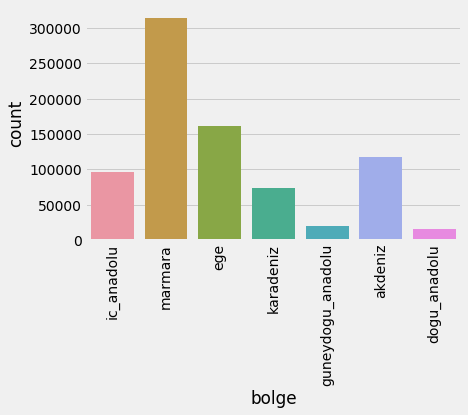

In [120]:
print(data.bolge.value_counts())
sns.countplot(data.bolge)
plt.xticks(rotation=90)

##### 1.1.3.2 Distribution of the hotel_types

City      541296
summer    258972
Name: hotel_types, dtype: int64


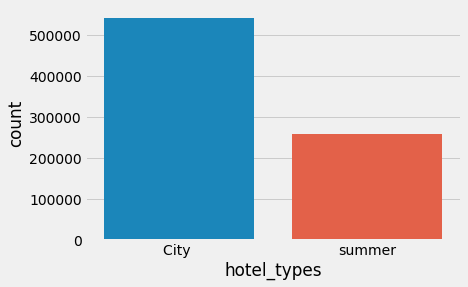

In [121]:
print(data.hotel_types.value_counts())
sns.countplot(data.hotel_types)

##### 1.1.3.3 Distribution of the status

ParçalıBulutlu                     163737
AzBulutlu                          128278
Güneşli                             89800
ÇoğunluklaBulutlu                   81355
GökGürültülüSağnakYağmur            78249
SağanakYağış                        68381
Yağmurlu                            62684
Bulutlu                             23150
ParçalıGüneşliSağanakYağış          20502
Sisli                               13129
Kar Yağışlı                         11612
Karla Karışık Yağmur                 8870
ÇoğunluklaBulutluSağanakYağışlı      4725
YoğunBulutlu                         1607
Yoğun Kar Fırtınası                  1163
Parçalı Güneşli Kar Fırtınası         365
Rüzgarlı                              257
Çoğunlukla Bulutlu Kar Yağışlı        255
Ara Ara Dolu Yağışı                    92
Yoğun Soğuk                            67
Buzlanma                                4
Name: Status, dtype: int64


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]), <a list of 21 Text xticklabel objects>)

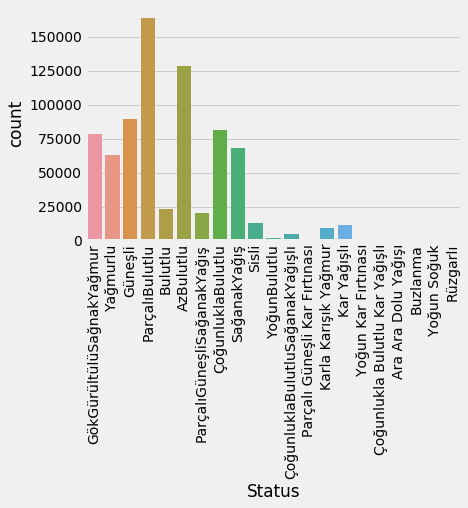

In [122]:
print(data.Status.value_counts())
sns.countplot(data.Status)
plt.xticks(rotation=90)

##### 1.1.3.4 Distribution of the weekday

Thursday     120321
Wednesday    117295
Monday       115905
Tuesday      114808
Friday       113499
Sunday       113481
Saturday     104959
Name: weekday, dtype: int64


(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text xticklabel objects>)

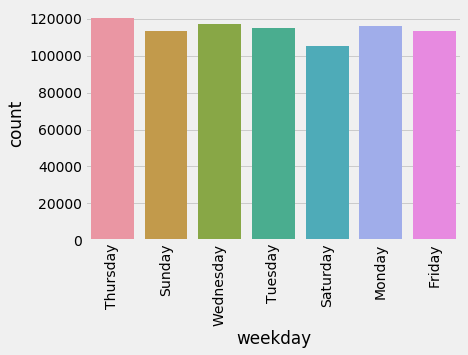

In [123]:
print(data.weekday.value_counts())
sns.countplot(data.weekday)
plt.xticks(rotation=90)

##### 1.1.3.5.1 Distribution of the log_date

2018-07    100908
2019-01     99179
2018-10     92026
2018-12     88988
2018-06     88008
2018-11     86554
2018-08     83480
2018-05     82746
2018-09     78379
Name: log_date, dtype: int64


(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), <a list of 9 Text xticklabel objects>)

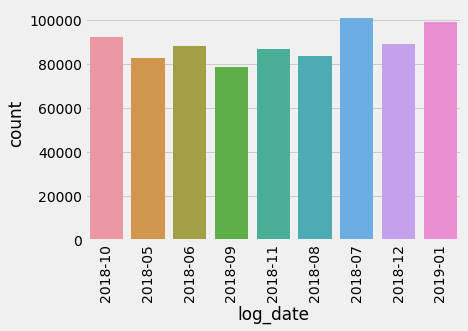

In [124]:
print(data.log_date.value_counts())
sns.countplot(data.log_date)
plt.xticks(rotation=90)

##### 1.1.3.5.2 Distribution of the log_date_month

07    100908
01     99179
10     92026
12     88988
06     88008
11     86554
08     83480
05     82746
09     78379
Name: log_date_month, dtype: int64


(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), <a list of 9 Text xticklabel objects>)

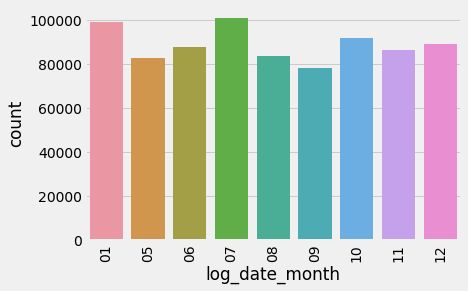

In [125]:
print(data.log_date_month.value_counts())
sns.countplot(data.log_date_month)
plt.xticks(rotation=90)

## 2 Bivariate Disribution (to see impact of variables on clicks)

### 2.1 Numerical Variables and clicks

In [126]:
numeric_features=data.select_dtypes(include=[np.number])
numeric_features.dtypes

Id                       int64
trivago_id               int64
hotel_impr               int64
avg_cpc                float64
clicks                   int64
rating                 float64
my_min_position        float64
my_price               float64
top4_min_price         float64
total_min_price          int64
rival1_price           float64
rival1_min_position    float64
rival2_price           float64
rival2_min_position    float64
profit                 float64
revenue                float64
total_night            float64
total_rooms            float64
holiday_diff             int64
days_of_holiday          int64
kur                    float64
opp_cpc                float64
dtype: object

#### 2.1.1 hotel_impr and clicks Analysis

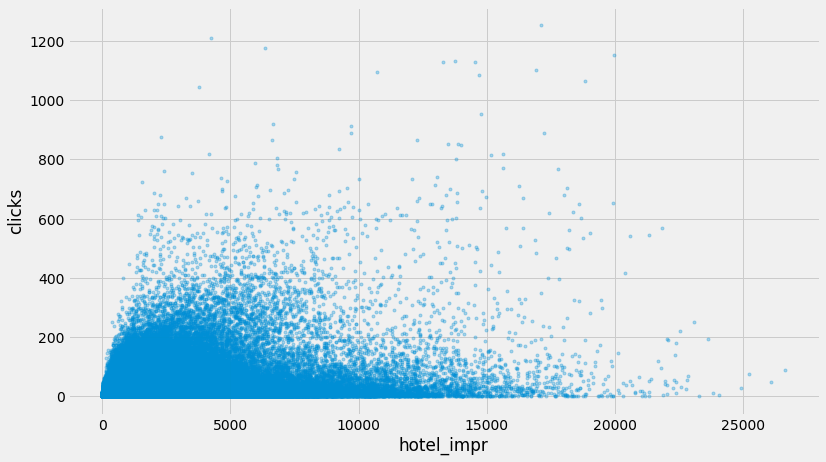

In [127]:
plt.figure(figsize=(12,7))
plt.xlabel("hotel_impr")
plt.ylabel("clicks")
plt.plot(data.hotel_impr, data["clicks"],'.', alpha = 0.3)

#### 2.1.2 avg_cpc and clicks Analysis

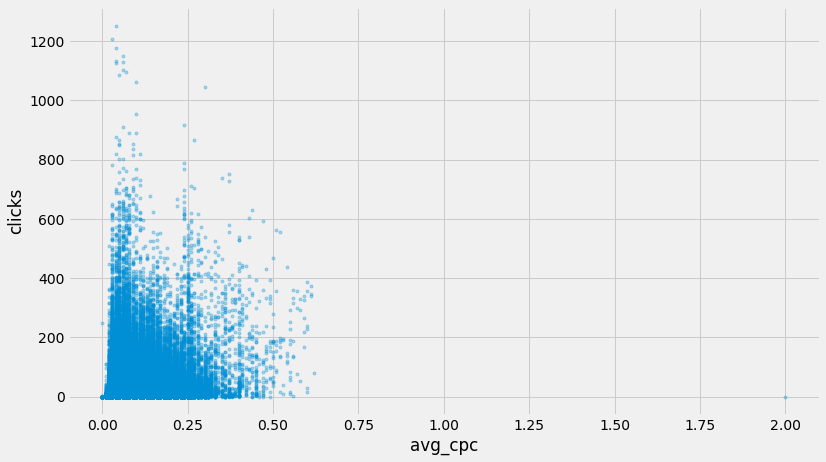

In [128]:
plt.figure(figsize=(12,7))
plt.xlabel("avg_cpc")
plt.ylabel("clicks")
plt.plot(data.avg_cpc, data["clicks"],'.', alpha = 0.3)

#### 2.1.3 my_price and clicks Analysis

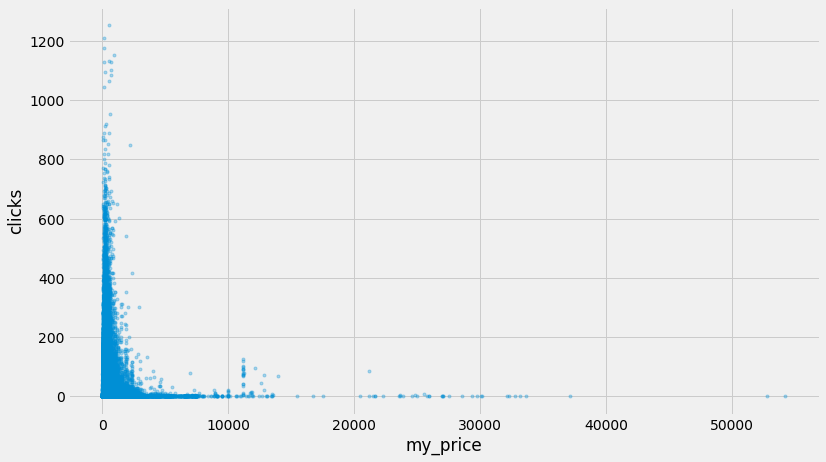

In [129]:
plt.figure(figsize=(12,7))
plt.xlabel("my_price")
plt.ylabel("clicks")
plt.plot(data.my_price, data["clicks"],'.', alpha = 0.3)

#### 2.1.4 top4_min__price and clicks Analysis

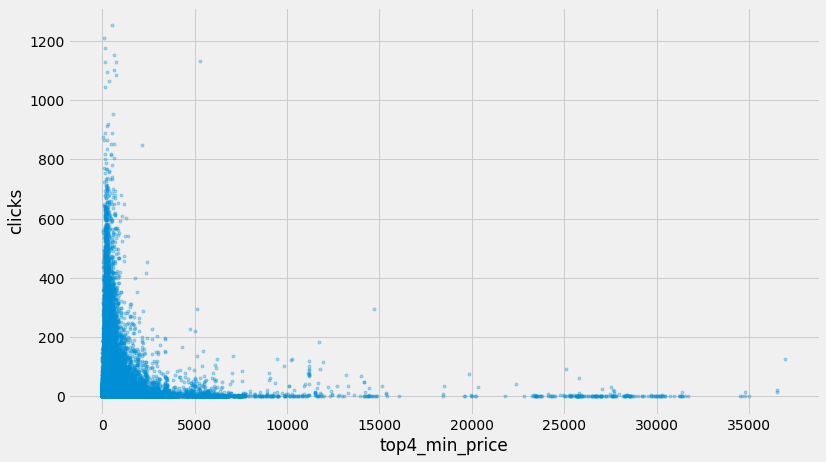

In [130]:
plt.figure(figsize=(12,7))
plt.xlabel("top4_min_price")
plt.ylabel("clicks")
plt.plot(data.top4_min_price, data["clicks"],'.', alpha = 0.3)

#### 2.1.5 total_min_price and clicks Analysis

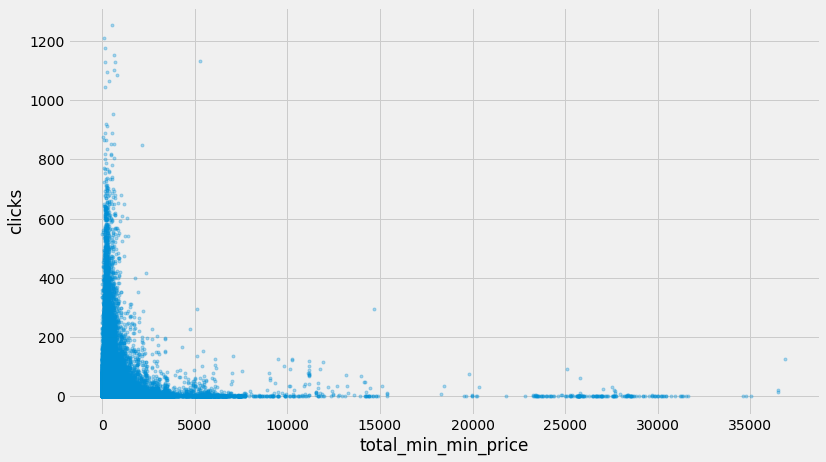

In [131]:
plt.figure(figsize=(12,7))
plt.xlabel("total_min_min_price")
plt.ylabel("clicks")
plt.plot(data.total_min_price, data["clicks"],'.', alpha = 0.3)

#### 2.1.6 rival1_price and clicks Analysis

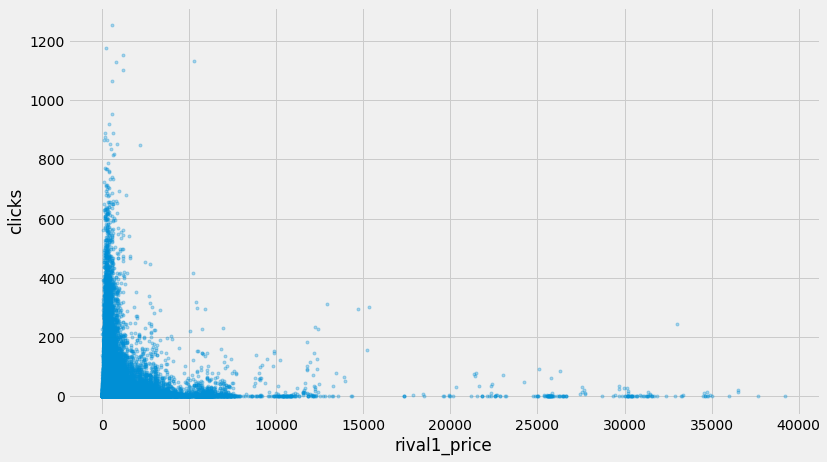

In [132]:
plt.figure(figsize=(12,7))
plt.xlabel("rival1_price")
plt.ylabel("clicks")
plt.plot(data.rival1_price, data["clicks"],'.', alpha = 0.3)

#### 2.1.7 rival2_price and clicks Analysis

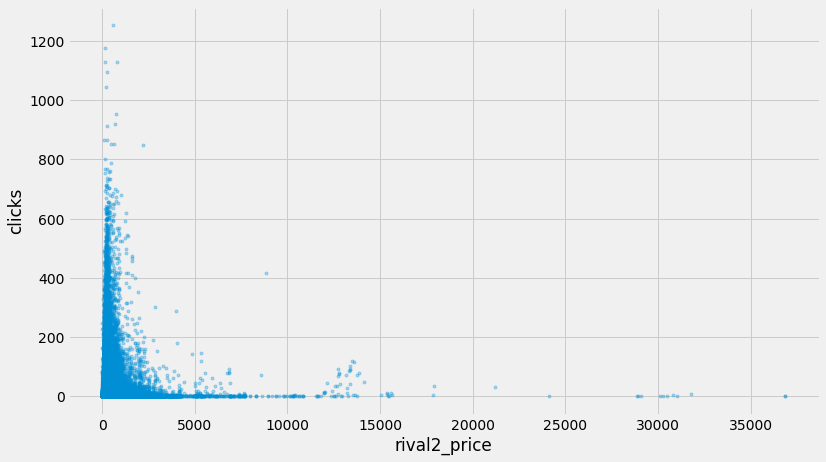

In [133]:
plt.figure(figsize=(12,7))
plt.xlabel("rival2_price")
plt.ylabel("clicks")
plt.plot(data.rival2_price, data["clicks"],'.', alpha = 0.3)

#### 2.1.8 profit and clicks

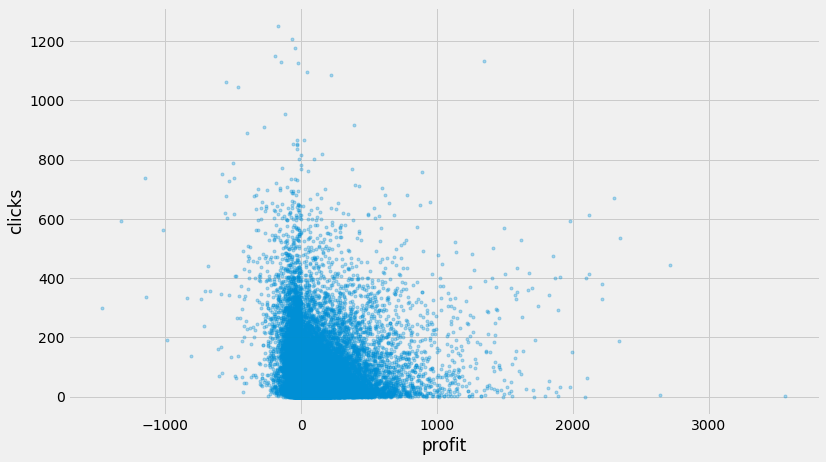

In [134]:
plt.figure(figsize=(12,7))
plt.xlabel("profit")
plt.ylabel("clicks")
plt.plot(data.profit, data["clicks"],'.', alpha = 0.3)

#### 2.1.9 revenue and clicks Analysis

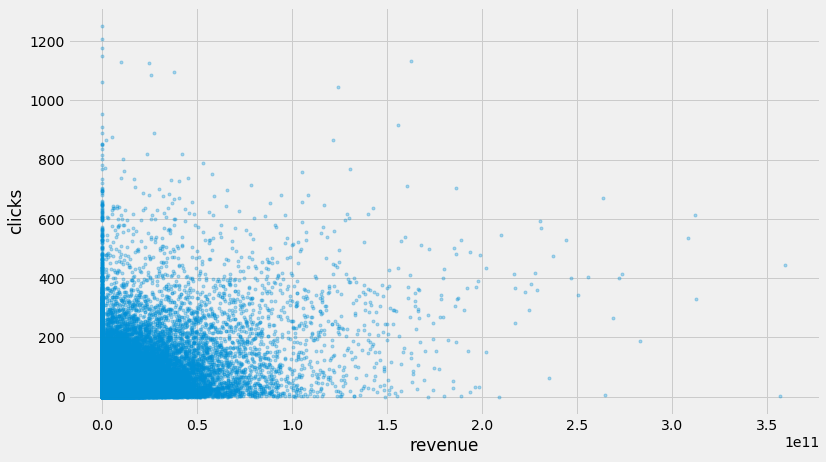

In [135]:
plt.figure(figsize=(12,7))
plt.xlabel("revenue")
plt.ylabel("clicks")
plt.plot(data.revenue, data["clicks"],'.', alpha = 0.3)

#### 2.1.10 total_night and clicks Analysis

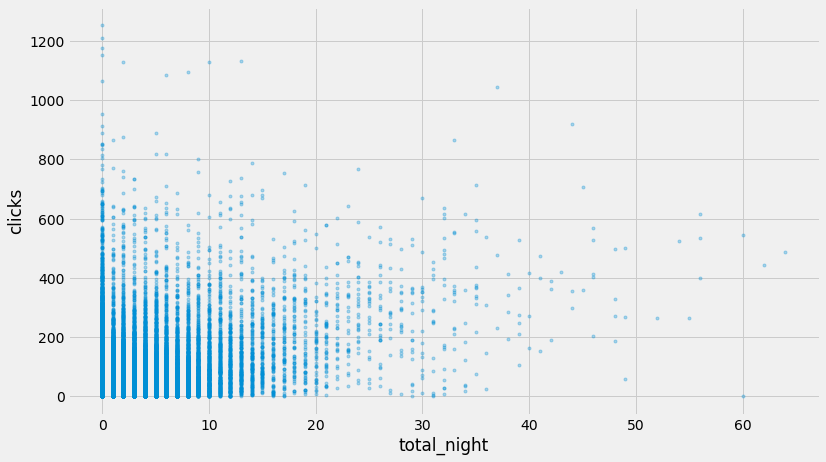

In [136]:
plt.figure(figsize=(12,7))
plt.xlabel("total_night")
plt.ylabel("clicks")
plt.plot(data.total_night, data["clicks"],'.', alpha = 0.3)

#### 2.1.11 total_rooms and clicks Analysis

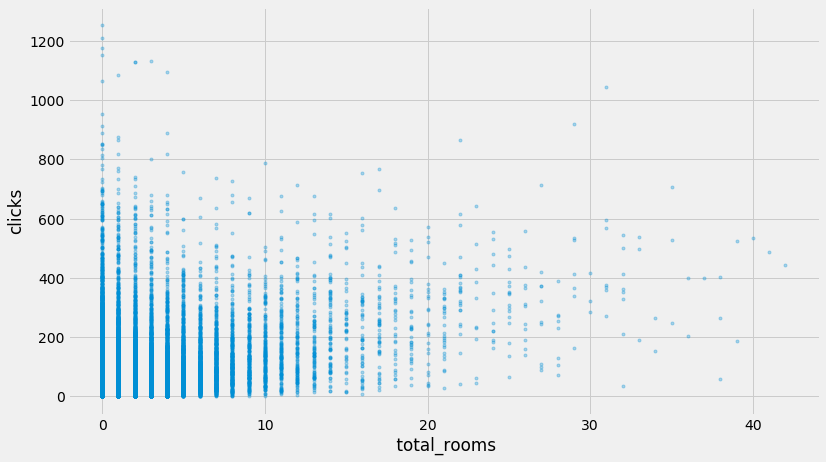

In [137]:
plt.figure(figsize=(12,7))
plt.xlabel(" total_rooms")
plt.ylabel("clicks")
plt.plot(data. total_rooms, data["clicks"],'.', alpha = 0.3)

#### 2.1.12 holiday_diff and clicks Analysis

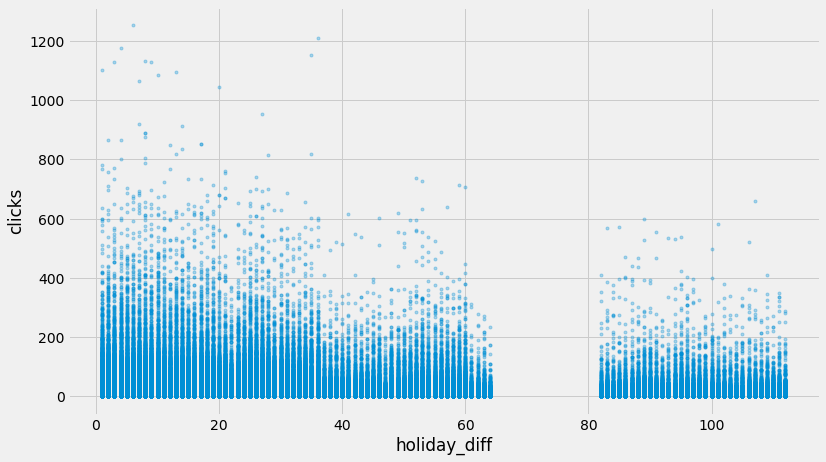

In [138]:
plt.figure(figsize=(12,7))
plt.xlabel("holiday_diff")
plt.ylabel("clicks")
plt.plot(data.holiday_diff, data["clicks"],'.', alpha = 0.3)

#### 2.1.13 days_of_holiday and clicks Analysis

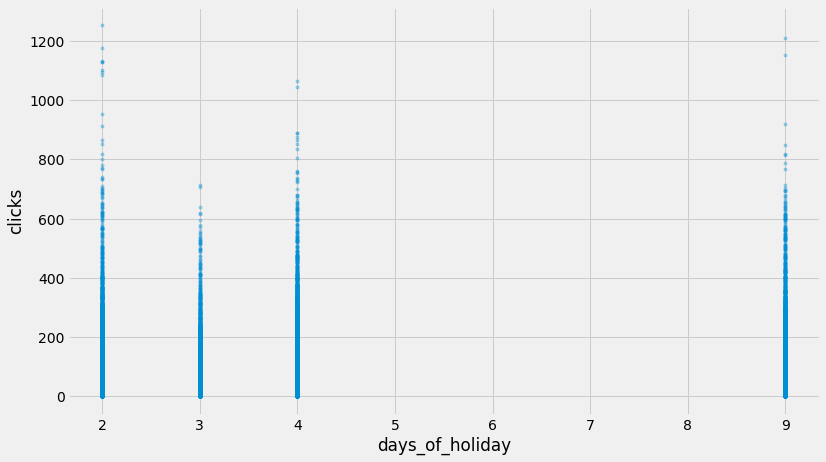

In [139]:
plt.figure(figsize=(12,7))
plt.xlabel("days_of_holiday")
plt.ylabel("clicks")
plt.plot(data.days_of_holiday, data["clicks"],'.', alpha = 0.3)

#### 2.1.14 kur and clicks Analysis

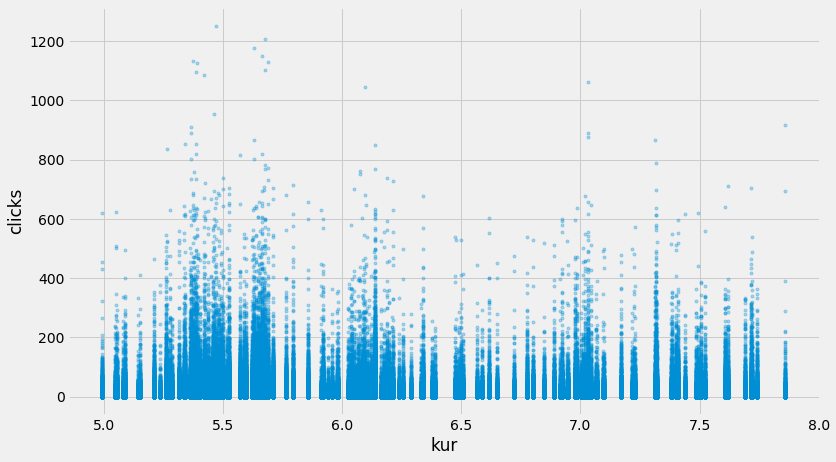

In [140]:
plt.figure(figsize=(12,7))
plt.xlabel("kur")
plt.ylabel("clicks")
plt.plot(data.kur, data["clicks"],'.', alpha = 0.3)

#### 2.1.15 opp_cpc and clicks Analysis

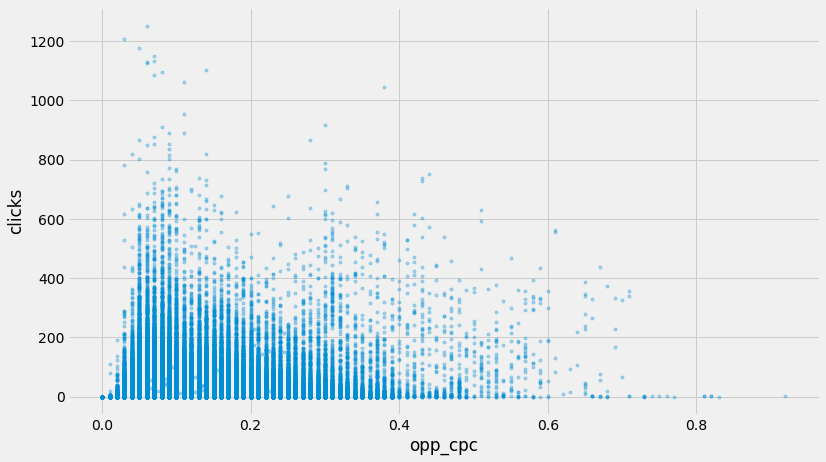

In [141]:
plt.figure(figsize=(12,7))
plt.xlabel("opp_cpc")
plt.ylabel("clicks")
plt.plot(data.opp_cpc, data["clicks"],'.', alpha = 0.3)

#### 2.1.16 revenue and clicks Analysis

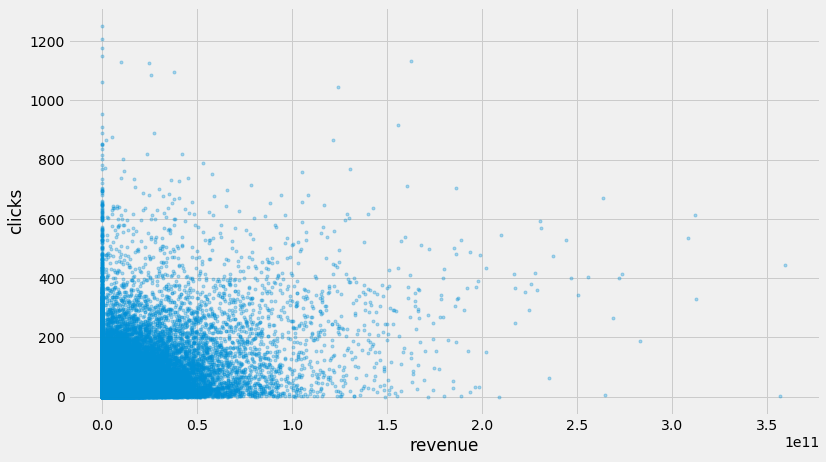

In [142]:
plt.figure(figsize=(12,7))
plt.xlabel("revenue")
plt.ylabel("clicks")
plt.plot(data.revenue, data["clicks"],'.', alpha = 0.3)

### 2.2. Categorical Variables and clicks

In [143]:
categorical_features = data.select_dtypes(include=[np.object])
categorical_features.dtypes

booking_value_index    object
stars                  object
weekday                object
log_date               object
hotel_types            object
bolge                  object
Status                 object
log_date_month         object
dtype: object

#### 2.2.1 Impact of trivago_id on clicks

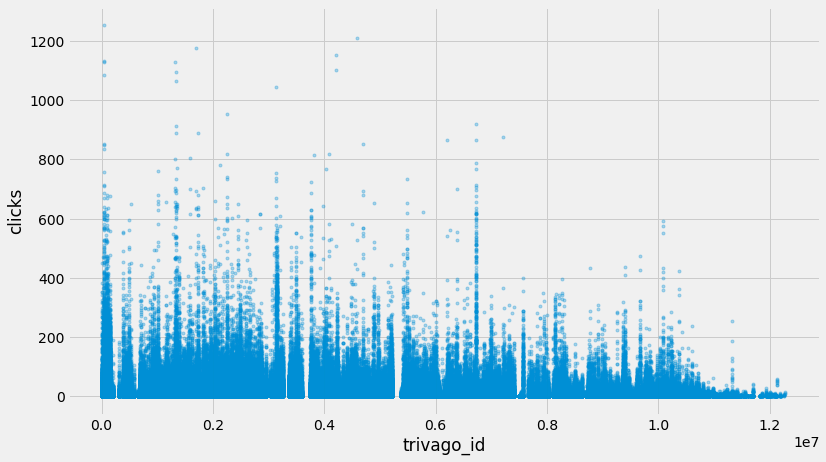

In [144]:
plt.figure(figsize=(12,7))
plt.xlabel("trivago_id")
plt.ylabel("clicks")
plt.plot(data.trivago_id , data["clicks"],'.', alpha = 0.3)

#### 2.2.2 Impact of weekday on clicks

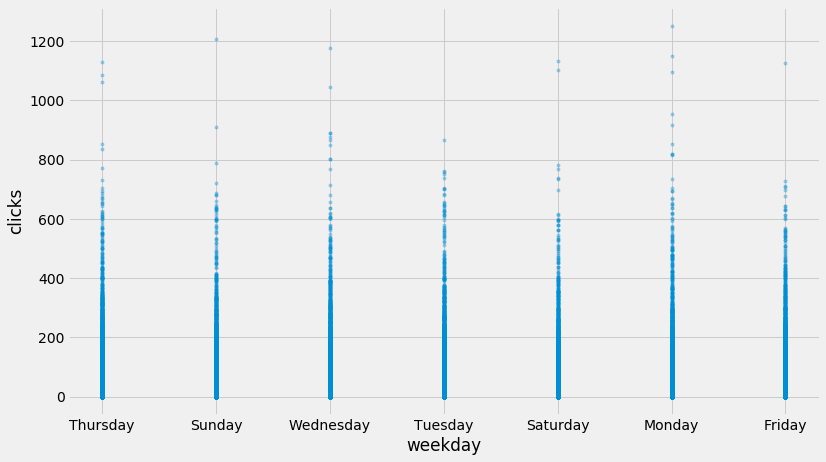

In [145]:
plt.figure(figsize=(12,7))
plt.xlabel("weekday")
plt.ylabel("clicks")
plt.plot(data.weekday , data["clicks"],'.', alpha = 0.3)

#### 2.2.3 Impact of log_date on clicks

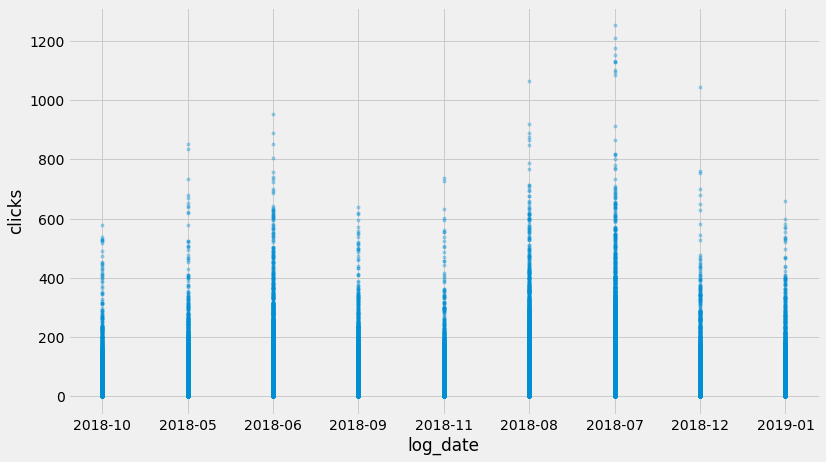

In [146]:
plt.figure(figsize=(12,7))
plt.xlabel("log_date")
plt.ylabel("clicks")
plt.plot(data.log_date , data["clicks"],'.', alpha = 0.3)

#### 2.2.4 Impact of log_date_month on clicks

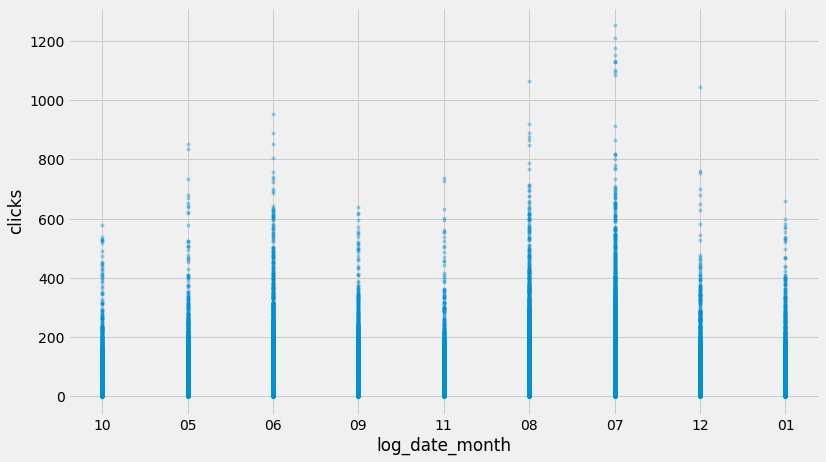

In [147]:
plt.figure(figsize=(12,7))
plt.xlabel("log_date_month")
plt.ylabel("clicks")
plt.plot(data.log_date_month , data["clicks"],'.', alpha = 0.3)

#### 2.2.5 Impact of hotel_types   on clicks

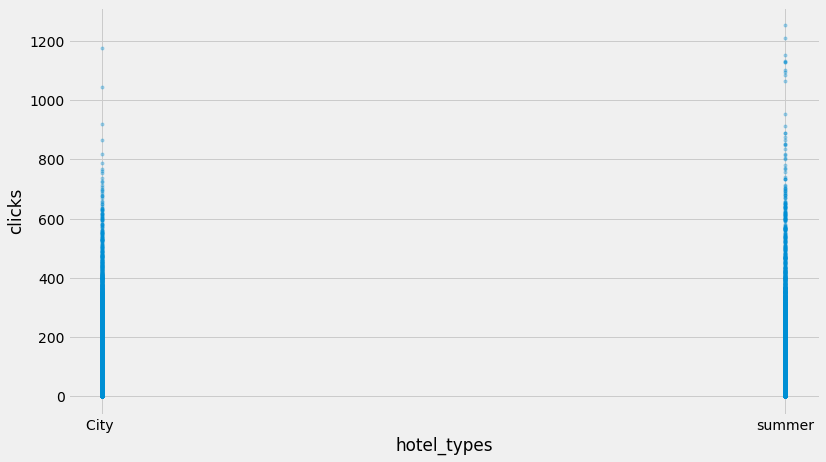

In [148]:
plt.figure(figsize=(12,7))
plt.xlabel("hotel_types")
plt.ylabel("clicks")
plt.plot(data.hotel_types , data["clicks"],'.', alpha = 0.3)

#### 2.2.6 Impact of bolge on clicks

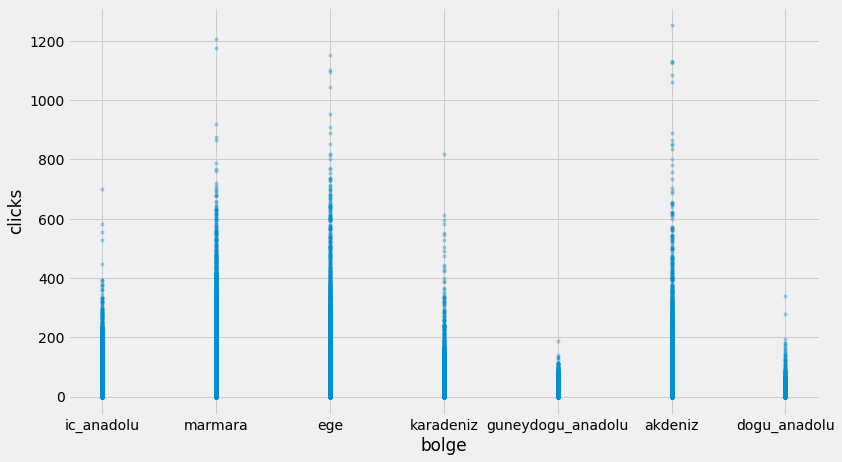

In [149]:
plt.figure(figsize=(12,7))
plt.xlabel("bolge")
plt.ylabel("clicks")
plt.plot(data.bolge , data["clicks"],'.', alpha = 0.3)

## 3. Data Cleaning

#### All Features

In [150]:
data.head()
data.columns.values
# data.shape   # log_date changed and source added, so 30 columns total

array(['Id', 'trivago_id', 'hotel_impr', 'avg_cpc', 'clicks',
       'booking_value_index', 'stars', 'rating', 'weekday', 'log_date',
       'hotel_types', 'my_min_position', 'my_price', 'top4_min_price',
       'total_min_price', 'rival1_price', 'rival1_min_position',
       'rival2_price', 'rival2_min_position', 'profit', 'revenue',
       'total_night', 'total_rooms', 'bolge', 'holiday_diff',
       'days_of_holiday', 'Status', 'kur', 'opp_cpc', 'log_date_month'],
      dtype=object)

### Number of missing values per variable

In [151]:
data.apply(lambda x: sum(x.isnull()))

Id                          0
trivago_id                  0
hotel_impr                  0
avg_cpc                  9050
clicks                      0
booking_value_index         0
stars                       0
rating                      0
weekday                     0
log_date                    0
hotel_types                 0
my_min_position         99086
my_price                99086
top4_min_price            522
total_min_price             0
rival1_price           249698
rival1_min_position    249698
rival2_price           342084
rival2_min_position    342084
profit                  37454
revenue                 28761
total_night             28761
total_rooms             28761
bolge                       0
holiday_diff                0
days_of_holiday             0
Status                  41986
kur                    136970
opp_cpc                 12483
log_date_month              0
dtype: int64

### Percentage of missing values per variable

In [152]:
data.isnull().sum()/data.shape[0]*100 #show values in percentage

Id                      0.000000
trivago_id              0.000000
hotel_impr              0.000000
avg_cpc                 1.130871
clicks                  0.000000
booking_value_index     0.000000
stars                   0.000000
rating                  0.000000
weekday                 0.000000
log_date                0.000000
hotel_types             0.000000
my_min_position        12.381602
my_price               12.381602
top4_min_price          0.065228
total_min_price         0.000000
rival1_price           31.201797
rival1_min_position    31.201797
rival2_price           42.746180
rival2_min_position    42.746180
profit                  4.680182
revenue                 3.593921
total_night             3.593921
total_rooms             3.593921
bolge                   0.000000
holiday_diff            0.000000
days_of_holiday         0.000000
Status                  5.246492
kur                    17.115516
opp_cpc                 1.559852
log_date_month          0.000000
dtype: flo

## 3.1 Imputing Missing Values

### 3.1.1 Numeric variables which require imputation

### Imputation of avg_cpc variable with the mean of avg_cpc values of the hotel

In [153]:
miss_bool = data['avg_cpc'].isnull() 

#Impute data and check #missing values before and after imputation to confirm
print ('Original #missing: %d'% sum(miss_bool))

#data.loc[miss_bool,'avg_cpc'] = data["avg_cpc"].mean()

data['avg_cpc']=data['avg_cpc'].fillna(data.groupby('trivago_id')['avg_cpc'].transform('mean'))

# data.loc[miss_bool,'avg_cpc'] = data.loc[miss_bool,'trivago_id'].apply(lambda x: hotel_avg_cpc[x])
print ('missing: %d'% sum(data['avg_cpc'].isnull()))


# If hotel seems just once in the data, impute with mean of the variable.
miss_bool = data['avg_cpc'].isnull() 
data.loc[miss_bool,'avg_cpc'] = data["avg_cpc"].mean()
print ('Final #missing: %d'% sum(data['avg_cpc'].isnull()))

Original #missing: 9050
missing: 1
Final #missing: 0


### Imputation of my_price variable with the mean of my_price values of the hotel

In [154]:
miss_bool = data['my_price'].isnull() 

#Impute data and check #missing values before and after imputation to confirm
print ('Original #missing: %d'% sum(miss_bool))

data['my_price']=data['my_price'].fillna(data.groupby('trivago_id')['my_price'].transform('mean'))

# data.loc[miss_bool,'avg_cpc'] = data.loc[miss_bool,'trivago_id'].apply(lambda x: hotel_avg_cpc[x])
print ('missing: %d'% sum(data['my_price'].isnull()))

# If hotel seems just once in the data, impute with mean of the variable.
miss_bool = data['my_price'].isnull() 
data.loc[miss_bool,'my_price'] = data["my_price"].mean()
print ('Final #missing: %d'% sum(data['my_price'].isnull()))

Original #missing: 99086
missing: 2725
Final #missing: 0


### Imputation of top4_min_price variable with the mean of top_4_min_price

In [155]:
miss_bool = data['top4_min_price'].isnull() 

#Impute data and check #missing values before and after imputation to confirm
print ('Original #missing: %d'% sum(miss_bool))

data['top4_min_price']=data['top4_min_price'].fillna(data.groupby('trivago_id')['top4_min_price'].transform('mean'))

# data.loc[miss_bool,'avg_cpc'] = data.loc[miss_bool,'trivago_id'].apply(lambda x: hotel_avg_cpc[x])
print ('missing: %d'% sum(data['top4_min_price'].isnull()))

# If hotel seems just once in the data, impute with mean of the variable.
miss_bool = data['top4_min_price'].isnull() 
data.loc[miss_bool,'top4_min_price'] = data["top4_min_price"].mean()
print ('Final #missing: %d'% sum(data['top4_min_price'].isnull()))


Original #missing: 522
missing: 0
Final #missing: 0


### Imputation of profit variable with the mean of profit values of the hotel

In [156]:

miss_bool = data['profit'].isnull() 

#Impute data and check #missing values before and after imputation to confirm
print ('Original #missing: %d'% sum(miss_bool))


#Impute data and check #missing values before and after imputation to confirm
print ('Original #missing: %d'% sum(miss_bool))

data['profit']=data['profit'].fillna(data.groupby('trivago_id')['profit'].transform('mean'))

# data.loc[miss_bool,'avg_cpc'] = data.loc[miss_bool,'trivago_id'].apply(lambda x: hotel_avg_cpc[x])
print ('missing: %d'% sum(data['profit'].isnull()))

# If hotel seems just once in the data, impute with mean of avg_cpc.
miss_bool = data['profit'].isnull() 
data.loc[miss_bool,'profit'] = data["profit"].mean()
print ('Final #missing: %d'% sum(data['profit'].isnull()))

Original #missing: 37454
Original #missing: 37454
missing: 89
Final #missing: 0


### Imputation of revenue variable with the mean of revenue values of the hotel

In [157]:

miss_bool = data['revenue'].isnull() 

#Impute data and check #missing values before and after imputation to confirm
print ('Original #missing: %d'% sum(miss_bool))

data['revenue']=data['revenue'].fillna(data.groupby('trivago_id')['revenue'].transform('mean'))

# data.loc[miss_bool,'avg_cpc'] = data.loc[miss_bool,'trivago_id'].apply(lambda x: hotel_avg_cpc[x])
print ('missing: %d'% sum(data['revenue'].isnull()))

# If hotel seems just once in the data, impute with mean of avg_cpc.
miss_bool = data['revenue'].isnull() 
data.loc[miss_bool,'revenue'] = data["revenue"].mean()
print ('Final #missing: %d'% sum(data['revenue'].isnull()))


# data.loc[miss_bool,'avg_cpc'] = data.loc[miss_bool,'trivago_id'].apply(lambda x: hotel_revenue[x])
print ('Final #missing: %d'% sum(data['revenue'].isnull()))

Original #missing: 28761
missing: 89
Final #missing: 0
Final #missing: 0


### Imputation of kur variable with the mean of kur values of the hotel

In [158]:

miss_bool = data['kur'].isnull() 

#Impute data and check #missing values before and after imputation to confirm
print ('Original #missing: %d'% sum(miss_bool))

data['kur']=data['kur'].fillna(data.groupby('trivago_id')['kur'].transform('mean'))

# data.loc[miss_bool,'avg_cpc'] = data.loc[miss_bool,'trivago_id'].apply(lambda x: hotel_avg_cpc[x])
print ('missing: %d'% sum(data['kur'].isnull()))

# If hotel seems just once in the data, impute with mean of the variable.
miss_bool = data['kur'].isnull() 
data.loc[miss_bool,'kur'] = data["kur"].mean()
print ('Final #missing: %d'% sum(data['kur'].isnull()))


# data.loc[miss_bool,'avg_cpc'] = data.loc[miss_bool,'trivago_id'].apply(lambda x: hotel_revenue[x])
print ('Final #missing: %d'% sum(data['kur'].isnull()))

Original #missing: 136970
missing: 962
Final #missing: 0
Final #missing: 0


### Imputation of opp_cpc variable with the mean of opp_cpc values of the hotel


In [159]:
miss_bool = data['opp_cpc'].isnull() 

#Impute data and check #missing values before and after imputation to confirm
print ('Original #missing: %d'% sum(miss_bool))


data['opp_cpc']=data['opp_cpc'].fillna(data.groupby('trivago_id')['opp_cpc'].transform('mean'))

# data.loc[miss_bool,'avg_cpc'] = data.loc[miss_bool,'trivago_id'].apply(lambda x: hotel_avg_cpc[x])
print ('missing: %d'% sum(data['opp_cpc'].isnull()))


# If hotel seems just once in the data, impute with mean of the variable.
miss_bool = data['opp_cpc'].isnull() 
data.loc[miss_bool,'opp_cpc'] = data["opp_cpc"].mean()
print ('Final #missing: %d'% sum(data['opp_cpc'].isnull()))

Original #missing: 12483
missing: 8
Final #missing: 0


### Imputation of rival1_price variable with the mean of rival1_price values of the hotel

In [160]:
miss_bool = data['rival1_price'].isnull() 

#Impute data and check #missing values before and after imputation to confirm
print ('Original #missing: %d'% sum(miss_bool))

data['rival1_price']=data['rival1_price'].fillna(data.groupby('trivago_id')['rival1_price'].transform('mean'))

# data.loc[miss_bool,'avg_cpc'] = data.loc[miss_bool,'trivago_id'].apply(lambda x: hotel_avg_cpc[x])
print ('missing: %d'% sum(data['rival1_price'].isnull()))

# If hotel seems just once in the data, impute with mean of the variable.
miss_bool = data['rival1_price'].isnull() 
data.loc[miss_bool,'rival1_price'] = data["rival1_price"].mean()
print ('Final #missing: %d'% sum(data['rival1_price'].isnull()))

Original #missing: 249698
missing: 77166
Final #missing: 0


### Imputation of rival2_price variable with the mean of rival2_price values of the hotel

In [161]:
miss_bool = data['rival2_price'].isnull() 

#Impute data and check #missing values before and after imputation to confirm
print ('Original #missing: %d'% sum(miss_bool))

data['rival2_price']=data['rival2_price'].fillna(data.groupby('trivago_id')['rival2_price'].transform('mean'))

# data.loc[miss_bool,'avg_cpc'] = data.loc[miss_bool,'trivago_id'].apply(lambda x: hotel_avg_cpc[x])
print ('missing: %d'% sum(data['rival2_price'].isnull()))

# If hotel seems just once in the data, impute with mean of the variable.
miss_bool = data['rival2_price'].isnull() 
data.loc[miss_bool,'rival2_price'] = data["rival2_price"].mean()
print ('Final #missing: %d'% sum(data['rival2_price'].isnull()))

Original #missing: 342084
missing: 99380
Final #missing: 0


### Imputation of total night variable with the mean of total night values of the hotel

In [162]:
miss_bool = data['total_night'].isnull() 

#Impute data and check #missing values before and after imputation to confirm
print ('Original #missing: %d'% sum(miss_bool))

data['total_night']=data['total_night'].fillna(data.groupby('trivago_id')['total_night'].transform('mean'))

# data.loc[miss_bool,'avg_cpc'] = data.loc[miss_bool,'trivago_id'].apply(lambda x: hotel_avg_cpc[x])
print ('missing: %d'% sum(data['total_night'].isnull()))

# If hotel seems just once in the data, impute with mean of the variable..
miss_bool = data['total_night'].isnull() 
data.loc[miss_bool,'total_night'] = data["total_night"].mean()
print ('Final #missing: %d'% sum(data['total_night'].isnull()))

Original #missing: 28761
missing: 89
Final #missing: 0


### Imputation of total_rooms variable with the mean of total_rooms values of the hotel


In [163]:
miss_bool = data['total_rooms'].isnull() 

#Impute data and check #missing values before and after imputation to confirm
print ('Original #missing: %d'% sum(miss_bool))

data['total_rooms']=data['total_rooms'].fillna(data.groupby('trivago_id')['total_rooms'].transform('mean'))

# data.loc[miss_bool,'avg_cpc'] = data.loc[miss_bool,'trivago_id'].apply(lambda x: hotel_avg_cpc[x])
print ('missing: %d'% sum(data['total_rooms'].isnull()))

# If hotel seems just once in the data, impute with mean of the variable.
miss_bool = data['total_rooms'].isnull() 
data.loc[miss_bool,'total_rooms'] = data["total_rooms"].mean()
print ('Final #missing: %d'% sum(data['total_rooms'].isnull()))

Original #missing: 28761
missing: 89
Final #missing: 0


### 3.1.2  Categorical variables which require imputation

#### Impute 'Status' variable according to mode of the 'bolge' variable

In [164]:
##### Import mode function:
from scipy.stats import mode

#Determing the count for each, (mode function : be careful, https://stackoverflow.com/questions/44692923/python-mode-imputation-apply-mode-for-one-column-on-another)

Status_mode = data.pivot_table(values='Status',
                                   columns='bolge',
                                   aggfunc=lambda x: x.mode().iat[0])
print (Status_mode)

#Get a boolean variable specifying missing Outlet_Size values
miss_bool = data['Status'].isnull() 

# Impute data and check missing values before and after imputation to confirm

print ('\nOriginal #missing: %d'% sum(miss_bool))
data.loc[miss_bool,'Status'] = data.loc[miss_bool,'bolge'].apply(lambda x:Status_mode[x])
print (sum(data['Status'].isnull()))





bolge   akdeniz dogu_anadolu             ege guneydogu_anadolu ic_anadolu  \
Status  Güneşli    AzBulutlu  ParçalıBulutlu           Güneşli  AzBulutlu   

bolge        karadeniz         marmara  
Status  ParçalıBulutlu  ParçalıBulutlu  

Original #missing: 41986
0


#### Impute my_min_position with its mode

In [165]:
my_min_position_mode = data.pivot_table(values='my_min_position',
                                   columns='bolge',
                                   aggfunc=lambda x: x.mode().iat[0])
print (my_min_position_mode)

#Get a boolean variable specifying missing Outlet_Size values
miss_bool = data['my_min_position'].isnull() 

# Impute data and check missing values before and after imputation to confirm

print ('\nOriginal #missing: %d'% sum(miss_bool))
data.loc[miss_bool,'my_min_position'] = data.loc[miss_bool,'bolge'].apply(lambda x: my_min_position_mode[x])
print (sum(data['my_min_position'].isnull()))

bolge            akdeniz  dogu_anadolu  ege  guneydogu_anadolu  ic_anadolu  \
my_min_position      1.0           1.0  1.0                1.0         1.0   

bolge            karadeniz  marmara  
my_min_position        1.0      1.0  

Original #missing: 99086
0


#### Impute rival1_min_position with its mode

In [166]:
rival1_min_position_mode = data.pivot_table(values='rival1_min_position',
                                   columns='bolge',
                                   aggfunc=lambda x: x.mode().iat[0])
print (rival1_min_position_mode)

#Get a boolean variable specifying missing Outlet_Size values
miss_bool = data['rival1_min_position'].isnull() 

# Impute data and check missing values before and after imputation to confirm

print ('\nOriginal #missing: %d'% sum(miss_bool))
data.loc[miss_bool,'rival1_min_position'] = data.loc[miss_bool,'bolge'].apply(lambda x: rival1_min_position_mode[x])
print (sum(data['rival1_min_position'].isnull()))


bolge                akdeniz  dogu_anadolu  ege  guneydogu_anadolu  \
rival1_min_position      1.0           1.0  1.0                1.0   

bolge                ic_anadolu  karadeniz  marmara  
rival1_min_position         1.0        1.0      1.0  

Original #missing: 249698
0


#### Impute rival2_min_position with its mode

In [167]:
rival2_min_position_mode = data.pivot_table(values='rival2_min_position',
                                   columns='bolge',
                                   aggfunc=lambda x: x.mode().iat[0])
print (rival2_min_position_mode)

#Get a boolean variable specifying missing Outlet_Size values
miss_bool = data['rival2_min_position'].isnull() 

# Impute data and check missing values before and after imputation to confirm

print ('\nOriginal #missing: %d'% sum(miss_bool))
data.loc[miss_bool,'rival2_min_position'] = data.loc[miss_bool,'bolge'].apply(lambda x: rival2_min_position_mode[x])
print (sum(data['rival2_min_position'].isnull()))

bolge                akdeniz  dogu_anadolu  ege  guneydogu_anadolu  \
rival2_min_position      1.0           2.0  1.0                2.0   

bolge                ic_anadolu  karadeniz  marmara  
rival2_min_position         2.0        1.0      2.0  

Original #missing: 342084
0


## 4 Feature Engineering :  

### 4.1 avg_cpc & opp_cpc ratio 

In [168]:
# Determine another variable to compare avg_cpc and opp_cpc
#data['avg_cpc_opp_cpc_comparision'] = data.apply(lambda x: x['avg_cpc']>x['opp_cpc'], axis=1)
#data.avg_cpc_opp_cpc_comparision = data.avg_cpc_opp_cpc_comparision.astype(str)
#print(data.avg_cpc_opp_cpc_comparision.head())

In [169]:
data.avg_cpc_opp_cpc_ratio = data.avg_cpc / data.opp_cpc
print(data.avg_cpc_opp_cpc_ratio.head())

0    0.750000
1    0.352941
2    0.695652
3    1.000000
4    0.687500
dtype: float64


C:\Users\ASUS\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.


### 4.2 my_price & rival1_price comparision

In [170]:
data['my_price_rival1_price_comparision'] = data.apply(lambda x: x['my_price']<x['rival1_price'], axis=1)
data['my_price_rival1_price_comparision'] = data.my_price_rival1_price_comparision.astype(str)
print(data.my_price_rival1_price_comparision.head())

0    False
1     True
2     True
3     True
4     True
Name: my_price_rival1_price_comparision, dtype: object


### 4.3 my_price & rival2_price comparision

In [171]:
data['my_price_rival2_price_comparision'] = data.apply(lambda x: x['my_price']<x['rival2_price'], axis=1)
data['my_price_rival2_price_comparision'] = data.my_price_rival2_price_comparision.astype(str)
print(data.my_price_rival2_price_comparision.head())

0    False
1    False
2     True
3     True
4     True
Name: my_price_rival2_price_comparision, dtype: object


### 4.4 my_price & total_min_price comparision

In [172]:
data['my_price_total_min_price_comparision'] = data.apply(lambda x: x['my_price']<x['total_min_price'], axis=1)
data['my_price_total_min_price_comparision'] = data.my_price_total_min_price_comparision.astype(str)
print(data.my_price_total_min_price_comparision.head())

0    False
1    False
2    False
3    False
4    False
Name: my_price_total_min_price_comparision, dtype: object


### 4.5 my_price & top_4_min_price comparision

In [173]:
data['my_price_top4_min_price_comparision'] = data.apply(lambda x: x['my_price']<x['top4_min_price'], axis=1)
data['my_price_top4_min_price_comparision'] = data.my_price_top4_min_price_comparision.astype(str)
print(data.my_price_top4_min_price_comparision.head())

0    False
1    False
2    False
3    False
4    False
Name: my_price_top4_min_price_comparision, dtype: object


### 4.6 Create 3 categories for rating

In [174]:
#Determine average rating of a hotel
rating_avg = data.pivot_table(values='rating', index='trivago_id')

#Impute 0 values with mean rating of that hotel:
miss_bool = (data['rating'] == 0)

print ('Number of 0 values initially: %d'%sum(miss_bool))
data.loc[miss_bool,'rating'] = data.loc[miss_bool,'trivago_id'].apply(lambda x: rating_avg.loc[x])
print ('Number of 0 values after modification: %d'%sum(data['rating'] == 0))

Number of 0 values initially: 185563
Number of 0 values after modification: 6204


In [175]:
#data["rating_level"] = ["low" if rating <50 each else "high" for each in data.rating]
data["rating_level"] = [('low' if i < 70  else ('middle' if 70 <= i <85 else 'high')) for i in data.rating]
data["rating_level"] = data.rating_level.astype(str)
print(data.rating_level.value_counts())

middle    485496
low       220476
high       94296
Name: rating_level, dtype: int64


### 4.7 Weekday or weekend

In [176]:
# Change categories of weekday :
print ('weekday Categories:')
print (data["weekday"].value_counts())

print ('\nweekday_weekend Categories:')
data["weekday_weekend"] = data["weekday"].map({'Monday':'weekday','Tuesday':'weekday','Wednesday':'weekday',
                                                   'Thursday':'weekday','Friday':'weekday',
                                                             'Saturday':'weekend',
                                                             'Sunday':'weekend'})

data["weekday_weekend"] = data.weekday_weekend.astype(str)
print (data["weekday_weekend"].value_counts())

weekday Categories:
Thursday     120321
Wednesday    117295
Monday       115905
Tuesday      114808
Friday       113499
Sunday       113481
Saturday     104959
Name: weekday, dtype: int64

weekday_weekend Categories:
weekday    581828
weekend    218440
Name: weekday_weekend, dtype: int64


### 4.8 Position Comparision and New Variable Visibility

### 4.8.1 Position is like inverse of visibility and visibility should be high. So define related visibility variables.

In [177]:
data.my_max_visibility = 1/ data.my_min_position
data.rival1_max_visibility = 1/data.rival1_min_position
data.rival2_max_visibility = 1/data.rival2_min_position

# data.my_min_position.head()
# data.my_min_visibility.head()

C:\Users\ASUS\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.
C:\Users\ASUS\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  
C:\Users\ASUS\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  This is separate from the ipykernel package so we can avoid doing imports until


### 4.8.2 Compare visibility scores

Hotels with higher visibility are likely to be clicked more. So, look at the visibility of the hotels in OTA and rivals.
This will give some idea about how much importance was given to that hotel in OTA as compared to rivals.

In [178]:
data.my_max_rival1_visibility_ratio = data.my_max_visibility / data.rival1_max_visibility 
data.my_max_rival2_visibility_ratio = data.my_max_visibility / data.rival2_max_visibility 
data.rival1_max_rival2_max_visibility_ratio = data.rival1_max_visibility / data.rival2_max_visibility 
print(data.my_max_rival1_visibility_ratio.head())
print(data.my_max_rival2_visibility_ratio.head())
print(data.rival1_max_rival2_max_visibility_ratio.head())

C:\Users\ASUS\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.
C:\Users\ASUS\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  
C:\Users\ASUS\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  This is separate from the ipykernel package so we can avoid doing imports until


0    2.000000
1    1.333333
2    2.000000
3    0.500000
4    2.000000
dtype: float64
0    4.000000
1    0.333333
2    4.000000
3    2.000000
4    2.000000
dtype: float64
0    2.00
1    0.25
2    2.00
3    4.00
4    1.00
dtype: float64


### 4.9 Drop some features (Since they will not be used)

In [179]:
data = data.drop(['weekday', 'rating','my_min_position','rival1_min_position','rival2_min_position','my_price','total_min_price','rival1_price','rival2_price'], axis=1)

## 5 Numerical and One-Hot Coding of Categorical variables

In [180]:
categorical_features=data.select_dtypes(include=[np.object])
categorical_features.dtypes

booking_value_index                     object
stars                                   object
log_date                                object
hotel_types                             object
bolge                                   object
Status                                  object
log_date_month                          object
my_price_rival1_price_comparision       object
my_price_rival2_price_comparision       object
my_price_total_min_price_comparision    object
my_price_top4_min_price_comparision     object
rating_level                            object
weekday_weekend                         object
dtype: object

## 5.1 Label Encoder

In [181]:
#Import library:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

#var_mod = ['weekday_weekend','avg_cpc_opp_cpc_comparision','my_price_rival1_price_comparision','my_price_rival2_price_comparision',
#           'my_price_total_min_price_comparision','my_price_top4_min_price_comparision',
#           'weekday', 'log_date','log_date_month','stars','booking_value_index','hotel_types', 'bolge','Status','rating_level']


var_mod = ['weekday_weekend','my_price_rival1_price_comparision','my_price_rival2_price_comparision',
           'my_price_total_min_price_comparision','my_price_top4_min_price_comparision',
            'log_date','log_date_month','stars','booking_value_index','hotel_types', 'bolge','Status','rating_level']




le = LabelEncoder()
for i in var_mod:
    data[i] = le.fit_transform(data[i])

## 5.2 One Hot Coding:

In [182]:
data = pd.get_dummies(data, columns = ['weekday_weekend','rating_level','my_price_rival1_price_comparision','my_price_rival2_price_comparision','my_price_total_min_price_comparision','my_price_top4_min_price_comparision', 'log_date','log_date_month','stars','booking_value_index','hotel_types', 'bolge','Status'])



## 5.3 Final data dimension and variables

In [183]:
print(data.shape)
print(data.dtypes)
# data.columns.values

(800268, 86)
Id                                          int64
trivago_id                                  int64
hotel_impr                                  int64
avg_cpc                                   float64
clicks                                      int64
top4_min_price                            float64
profit                                    float64
revenue                                   float64
total_night                               float64
total_rooms                               float64
holiday_diff                                int64
days_of_holiday                             int64
kur                                       float64
opp_cpc                                   float64
weekday_weekend_0                           uint8
weekday_weekend_1                           uint8
rating_level_0                              uint8
rating_level_1                              uint8
rating_level_2                              uint8
my_price_rival1_price_comparision_0  

## 6. Model Building and Results

### Create training and testing data sets, 80 % for training, 20 % for final testing


In [184]:
clicks =data.clicks # define target
X_train, X_test, y_train, y_test = train_test_split(data, clicks, test_size=0.2)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(640214, 86) (640214,)
(160054, 86) (160054,)


In [185]:
# Rename just for the sake of easiness
train = X_train
test = X_test

### Define a generic function which takes the algorithm and data as input and makes the model, performs cross-validation and shows RMSE and r-score performance 


In [186]:
#Define target and ID columns:
target = 'clicks'
IDcol = ['Id','trivago_id']

from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, r2_score

def modelfit(alg, dtrain, dtest, predictors, target, IDcol, filename):
    #Fit the algorithm on the data
    alg.fit(dtrain[predictors], dtrain[target])
        
    #Predict training set:
    dtrain_predictions = alg.predict(dtrain[predictors])

    #for RMSE
    
    #Perform cross-validation:
    cv_score = cross_val_score(alg, dtrain[predictors], dtrain[target], cv=20, scoring= 'neg_mean_squared_error')
    cv_score = np.sqrt(np.abs(cv_score))
    
    #Print model report:
    print ("\nModel Report")
    print ("RMSE : %.4g" % np.sqrt(mean_squared_error(dtrain[target].values, dtrain_predictions)))
    print ("CV Score : Mean - %.4g | Std - %.4g | Min - %.4g | Max - %.4g" % (np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score)))
    
    #Predict on testing data:
    dtest[target] = alg.predict(dtest[predictors])
    print ("Test_RMSE : %.4g" % np.sqrt(mean_squared_error(y_test, dtest[target])))
    

    #Export submission file:
    #IDcol.append(target)
    #submission = pd.DataFrame({ x: dtest[x] for x in IDcol})
    #submission.to_csv(filename, index=False)
    
    
    #for r2 score 
    
    #Perform cross-validation:
    cv_score = cross_val_score(alg, dtrain[predictors], dtrain[target], cv=20, scoring= 'r2')
    #cv_score = np.sqrt(np.abs(cv_score))
    
    #Print model report:
    print ("\nModel Report")
    print ("r2 : %.4g" % (r2_score(dtrain[target].values, dtrain_predictions)))
    print ("CV Score : Mean - %.4g | Std - %.4g | Min - %.4g | Max - %.4g" % (np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score)))
    
    #Predict on testing data:
    dtest[target] = alg.predict(dtest[predictors])
    print ("Test_r2 : %.4g" % (r2_score(y_test, dtest[target])))
    

# Linear Regression Model

In [187]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
predictors = [x for x in train.columns if x not in [target]+IDcol]
# print predictors
alg1 = LinearRegression(normalize=True)
modelfit(alg1, train, test, predictors, target, IDcol, 'alg1_trivago.csv')
#coef1 = pd.Series(alg1.coef_, predictors).sort_values()
#coef1.plot(kind='bar', title='Model Coefficients')


Model Report
RMSE : 22.24
CV Score : Mean - 22.23 | Std - 0.7794 | Min - 20.13 | Max - 23.8


C:\Users\ASUS\Anaconda3\lib\site-packages\ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Test_RMSE : 21.84

Model Report
r2 : 0.4526
CV Score : Mean - 0.4523 | Std - 0.02011 | Min - 0.4136 | Max - 0.488
Test_r2 : 0.4562


C:\Users\ASUS\Anaconda3\lib\site-packages\ipykernel_launcher.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


# Ridge Regression Model:

In [188]:
predictors = [x for x in train.columns if x not in [target]+IDcol]
alg2 = Ridge(alpha=0.05,normalize=True)
modelfit(alg2, train, test, predictors, target, IDcol, 'alg2.csv')
#coef2 = pd.Series(alg2.coef_, predictors).sort_values()
#coef2.plot(kind='bar', title='Model Coefficients')


Model Report
RMSE : 22.75
CV Score : Mean - 22.74 | Std - 0.7601 | Min - 20.67 | Max - 24.41


C:\Users\ASUS\Anaconda3\lib\site-packages\ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Test_RMSE : 22.31

Model Report
r2 : 0.4269
CV Score : Mean - 0.4268 | Std - 0.01907 | Min - 0.3856 | Max - 0.4601
Test_r2 : 0.4322


C:\Users\ASUS\Anaconda3\lib\site-packages\ipykernel_launcher.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


# Lasso

In [190]:
predictors = [x for x in train.columns if x not in [target]+IDcol]
alg = Lasso(normalize=True)
modelfit(alg, train, test, predictors, target, IDcol, 'alg.csv')
#coef2 = pd.Series(alg2.coef_, predictors).sort_values()
#coef2.plot(kind='bar', title='Model Coefficients')


Model Report
RMSE : 30.05
CV Score : Mean - 30.04 | Std - 0.8212 | Min - 28.14 | Max - 31.97


C:\Users\ASUS\Anaconda3\lib\site-packages\ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Test_RMSE : 29.61

Model Report
r2 : 0
CV Score : Mean - -3.397e-05 | Std - 4.606e-05 | Min - -0.0001786 | Max - -3.761e-07
Test_r2 : -3.051e-06


C:\Users\ASUS\Anaconda3\lib\site-packages\ipykernel_launcher.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


# Decision Tree Model

In [189]:
from sklearn.tree import DecisionTreeRegressor
predictors = [x for x in train.columns if x not in [target]+IDcol]
alg3 = DecisionTreeRegressor(max_depth=15, min_samples_leaf=100)
modelfit(alg3, train, test, predictors, target, IDcol, 'alg3.csv')
#coef3 = pd.Series(alg3.feature_importances_, predictors).sort_values(ascending=False)
#coef3.plot(kind='bar', title='Feature Importances')


Model Report
RMSE : 18.98
CV Score : Mean - 19.74 | Std - 0.7029 | Min - 18.1 | Max - 21.16


C:\Users\ASUS\Anaconda3\lib\site-packages\ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Test_RMSE : 19.32

Model Report
r2 : 0.6012
CV Score : Mean - 0.568 | Std - 0.0171 | Min - 0.5349 | Max - 0.5971
Test_r2 : 0.5742


C:\Users\ASUS\Anaconda3\lib\site-packages\ipykernel_launcher.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


## Random Forest Model

In [94]:
from sklearn.ensemble import RandomForestRegressor
predictors = [x for x in train.columns if x not in [target]+IDcol]
alg4 = RandomForestRegressor(n_estimators=200,max_depth=5, min_samples_leaf=100,n_jobs=4)
modelfit(alg4, train, test, predictors, target, IDcol, 'alg4.csv')
#coef4 = pd.Series(alg4.feature_importances_, predictors).sort_values(ascending=False)
#coef4.plot(kind='bar', title='Feature Importances')


Model Report
RMSE : 20.68
CV Score : Mean - 20.82 | Std - 0.782 | Min - 19.15 | Max - 22.3


C:\Users\ASUS\Anaconda3\lib\site-packages\ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Test_RMSE : 20.7

Model Report
r2 : 0.5252
CV Score : Mean - 0.5181 | Std - 0.01854 | Min - 0.4906 | Max - 0.5572
Test_r2 : 0.5164


C:\Users\ASUS\Anaconda3\lib\site-packages\ipykernel_launcher.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


### RF with different different parameters


Model Report
RMSE : 20.16
CV Score : Mean - 20.33 | Std - 0.7675 | Min - 18.59 | Max - 21.68


C:\Users\ASUS\Anaconda3\lib\site-packages\ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Test_RMSE : 20.17

Model Report
r2 : 0.5488
CV Score : Mean - 0.5406 | Std - 0.01861 | Min - 0.5138 | Max - 0.5806


C:\Users\ASUS\Anaconda3\lib\site-packages\ipykernel_launcher.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Test_r2 : 0.541


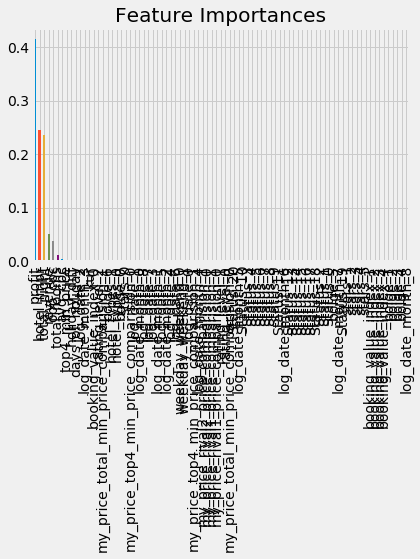

In [95]:
predictors = [x for x in train.columns if x not in [target]+IDcol]
alg5 = RandomForestRegressor(n_estimators=400,max_depth=6, min_samples_leaf=100,n_jobs=4)
modelfit(alg5, train, test, predictors, target, IDcol, 'alg5.csv')
coef5 = pd.Series(alg5.feature_importances_, predictors).sort_values(ascending=False)
coef5.plot(kind='bar', title='Feature Importances')